In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest


In [15]:
df_test_30 = pd.read_csv("/Users/youssouf/Documents/simboxv2/df_final_prediction_20210930.csv", sep = ";")
df_test_30.head()


,msisdn,distributeur,statut_voix,statut_sms,statut_ff,statut_sva,statut_data,statut_om,valeur,vol_tot_data,...,nbre_sms_in,nbre_dist_sms_in,nbre_voix_in,dur_in,nbre_dist_voix_in,nbre_sms_night,nbre_dist_sms_night,nbre_voix_night,dur_night,nbre_dist_voix_night
0,2250700004156,SII,0,0,0,0,0,0,0,0,...,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2250700008166,SII,0,0,0,0,0,0,0,0,...,10.0,2.0,10.0,748.0,6.0,0.0,0.0,0.0,0.0,0.0
2,2250700008178,SII,0,0,0,0,0,0,0,0,...,12.0,6.0,4.0,166.0,3.0,0.0,0.0,0.0,0.0,0.0
3,2250700008488,SII,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2250700010952,SII,0,0,0,0,0,0,0,0,...,11.0,3.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data = pd.read_csv('/Users/youssouf/Documents/simboxv2/simbox_v4_3.csv', sep = ";")
data.head(10)

,msisdn,distributeur,statut_voix,statut_sms,statut_ff,statut_sva,statut_data,statut_om,valeur,vol_tot_data,...,nbre_dist_sms_in,nbre_voix_in,dur_in,nbre_dist_voix_in,nbre_sms_night,nbre_dist_sms_night,nbre_voix_night,dur_night,nbre_dist_voix_night,statut
0,2250707492509,AMANDA,1.0,1.0,1.0,1.0,1.0,1.0,8249.0,1.0,...,1,0,0,0,0,0,0,0,0,0
1,2250708078700,AMANDA,1.0,1.0,1.0,1.0,1.0,1.0,8249.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,2250708160010,AMANDA,1.0,1.0,1.0,1.0,1.0,1.0,8249.0,1.0,...,1,0,0,0,0,0,0,0,0,0
3,2250708643787,AMANDA,1.0,1.0,1.0,1.0,1.0,1.0,8249.0,1.0,...,1,0,0,0,0,0,0,0,0,0
4,2250747888117,AMANDA,1.0,1.0,1.0,1.0,1.0,1.0,8249.0,1.0,...,1,0,0,0,0,0,0,0,0,0
5,2250748499700,AMANDA,1.0,1.0,1.0,1.0,1.0,1.0,8249.0,1.0,...,0,0,0,0,0,0,0,0,0,0
6,2250748882163,AMANDA,1.0,1.0,1.0,1.0,1.0,1.0,8249.0,1.0,...,0,0,0,0,0,0,0,0,0,0
7,2250749505761,AMANDA,1.0,1.0,1.0,1.0,1.0,1.0,8249.0,1.0,...,1,0,0,0,0,0,0,0,0,0
8,2250757041412,AMANDA,1.0,1.0,1.0,1.0,1.0,1.0,8249.0,1.0,...,1,0,0,0,0,0,0,0,0,0
9,2250758859442,AMANDA,1.0,1.0,1.0,1.0,1.0,1.0,8249.0,1.0,...,1,0,0,0,0,0,0,0,0,0


In [4]:
data.dtypes

msisdn                    int64
distributeur             object
statut_voix             float64
statut_sms              float64
statut_ff               float64
statut_sva              float64
statut_data             float64
statut_om               float64
valeur                  float64
vol_tot_data            float64
vol_tot_voix_offnet     float64
vol_tot_voix_onet       float64
date_appel               object
nbre_sms_out              int64
nbre_dist_sms_out         int64
nbre_voix_out             int64
dur_out                   int64
nbre_dist_voix_out        int64
nbre_cell_out             int64
nbre_sms_in               int64
nbre_dist_sms_in          int64
nbre_voix_in              int64
dur_in                    int64
nbre_dist_voix_in         int64
nbre_sms_night            int64
nbre_dist_sms_night       int64
nbre_voix_night           int64
dur_night                 int64
nbre_dist_voix_night      int64
statut                    int64
dtype: object

In [5]:
data.columns

Index(['msisdn', 'distributeur', 'statut_voix', 'statut_sms', 'statut_ff',
       'statut_sva', 'statut_data', 'statut_om', 'valeur', 'vol_tot_data',
       'vol_tot_voix_offnet', 'vol_tot_voix_onet', 'date_appel',
       'nbre_sms_out', 'nbre_dist_sms_out', 'nbre_voix_out', 'dur_out',
       'nbre_dist_voix_out', 'nbre_cell_out', 'nbre_sms_in',
       'nbre_dist_sms_in', 'nbre_voix_in', 'dur_in', 'nbre_dist_voix_in',
       'nbre_sms_night', 'nbre_dist_sms_night', 'nbre_voix_night', 'dur_night',
       'nbre_dist_voix_night', 'statut'],
      dtype='object')

In [16]:
data1 = data[['statut_voix', 'statut_sms', 'statut_ff',
       'statut_sva', 'statut_data', 'statut_om', 'valeur', 'vol_tot_data',
       'vol_tot_voix_offnet', 'vol_tot_voix_onet',
       'nbre_sms_out', 'nbre_dist_sms_out', 'nbre_voix_out', 'dur_out',
       'nbre_dist_voix_out', 'nbre_cell_out', 'nbre_sms_in',
       'nbre_dist_sms_in', 'nbre_voix_in', 'dur_in', 'nbre_dist_voix_in',
       'nbre_sms_night', 'nbre_dist_sms_night', 'nbre_voix_night', 'dur_night',
       'nbre_dist_voix_night', 'statut']]

In [17]:
df_train1 = data1[data1["statut"] == 1]
df_train2 = data1[data1["statut"] == 0]

#### Modele Isolation Forest

In [18]:
clf=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.12), \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(df_train2.drop(["statut"], axis = 1))


KeyboardInterrupt: 

#### Predict

In [ ]:
df_test_301 = df_test_30[['statut_voix', 'statut_sms', 'statut_ff',
       'statut_sva', 'statut_data', 'statut_om', 'valeur', 'vol_tot_data',
       'vol_tot_voix_offnet', 'vol_tot_voix_onet' ,
       'nbre_sms_out', 'nbre_dist_sms_out', 'nbre_voix_out', 'dur_out',
       'nbre_dist_voix_out', 'nbre_cell_out', 'nbre_sms_in',
       'nbre_dist_sms_in', 'nbre_voix_in', 'dur_in', 'nbre_dist_voix_in',
       'nbre_sms_night', 'nbre_dist_sms_night', 'nbre_voix_night', 'dur_night',
       'nbre_dist_voix_night', 'statut']]

In [2]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.ml.feature import *
from pyspark.ml import Pipeline
from pyspark.ml.classification import *
from pyspark.ml.feature import IndexToString, StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.sql import SparkSession
from pyspark.ml.classification import LinearSVC
from pyspark.ml.functions import vector_to_array
import pandas as pd
import numpy as np
import os
import pyarrow.parquet as pq
from pyspark.ml.feature import StandardScaler
from pyspark.sql.functions import mean as _mean, stddev as _stddev, col
from math import *

In [3]:
spark = SparkSession.builder.master("local[1]")\
          .appName("sunshine_v2")\
          .getOrCreate()

sc = spark.sparkContext
sc.setLogLevel("ERROR")

In [28]:
df_final = spark.read.option("delimiter", ";").option("header", True).csv("/Users/youssouf/Documents/simboxv2/simbox_v4_3.csv")
df_final.show(5)



+-------------+------------+-----------+----------+---------+----------+-----------+---------+------+------------+-------------------+-----------------+----------+------------+-----------------+-------------+-------+------------------+-------------+-----------+----------------+------------+------+-----------------+--------------+-------------------+---------------+---------+--------------------+------+
|       msisdn|distributeur|statut_voix|statut_sms|statut_ff|statut_sva|statut_data|statut_om|valeur|vol_tot_data|vol_tot_voix_offnet|vol_tot_voix_onet|date_appel|nbre_sms_out|nbre_dist_sms_out|nbre_voix_out|dur_out|nbre_dist_voix_out|nbre_cell_out|nbre_sms_in|nbre_dist_sms_in|nbre_voix_in|dur_in|nbre_dist_voix_in|nbre_sms_night|nbre_dist_sms_night|nbre_voix_night|dur_night|nbre_dist_voix_night|statut|
+-------------+------------+-----------+----------+---------+----------+-----------+---------+------+------------+-------------------+-----------------+----------+------------+------------

In [29]:
df_final.select("msisdn", "date_appel").show(5)

+-------------+----------+
|       msisdn|date_appel|
+-------------+----------+
|2250707492509|2021-09-21|
|2250708078700|2021-05-06|
|2250708160010|2021-05-06|
|2250708643787|2021-09-05|
|2250747888117|2021-09-09|
+-------------+----------+
only showing top 5 rows



In [31]:
df_final = df_final.withColumn("month", date_format(col("date_appel"), "M"))
df_final.select("msisdn", "date_appel", "month").show(5)  
                               
                               

+-------------+----------+-----+
|       msisdn|date_appel|month|
+-------------+----------+-----+
|2250707492509|2021-09-21|    9|
|2250708078700|2021-05-06|    5|
|2250708160010|2021-05-06|    5|
|2250708643787|2021-09-05|    9|
|2250747888117|2021-09-09|    9|
+-------------+----------+-----+
only showing top 5 rows



##### SOS Crédit Data 

In [25]:
df_avril = spark.read.option("delimiter", ";").option("header", True).csv("/Users/youssouf/Downloads/data_for_analyse_fraude/fraude_sos_credit_avr.csv")

df_avril.show(5)


+-------------+---------------+-------------------+
|       MSISDN|nbr_emprunt_sos|mnt_emprunt_tot_sos|
+-------------+---------------+-------------------+
|2250758807127|              1|                500|
|2250789285430|              1|                250|
|2250749534834|              1|                500|
|2250788064515|              2|                500|
|2250788130438|              3|               1000|
+-------------+---------------+-------------------+
only showing top 5 rows



In [45]:
df_avril = df_avril.withColumn("mnt_emprunt_tot_sos", col("mnt_emprunt_tot_sos").cast(DoubleType())) \
                    .withColumn("nbr_emprunt_sos", col("nbr_emprunt_sos").cast(DoubleType()))



In [46]:
df_avril.select("nbr_emprunt_sos","mnt_emprunt_tot_sos").describe().show()

+-------+------------------+-------------------+
|summary|   nbr_emprunt_sos|mnt_emprunt_tot_sos|
+-------+------------------+-------------------+
|  count|           3697199|            3697199|
|   mean|3.3055131736214363| 1589.4691494831627|
| stddev|  3.50498614336638|  2069.009027027498|
|    min|               1.0|              250.0|
|    max|              82.0|           128000.0|
+-------+------------------+-------------------+



In [48]:
df_avril.sort(desc("mnt_emprunt_tot_sos")).show()

+-------------+---------------+-------------------+
|       MSISDN|nbr_emprunt_sos|mnt_emprunt_tot_sos|
+-------------+---------------+-------------------+
|2250769814336|           64.0|           128000.0|
|2250767737619|           51.0|           102000.0|
|2250708503800|           47.0|            94000.0|
|2250709165512|           47.0|            94000.0|
|2250779381262|           48.0|            91500.0|
|2250707956535|           43.0|            86000.0|
|2250707248213|           41.0|            82000.0|
|2250707738666|           41.0|            82000.0|
|2250777555037|           41.0|            81000.0|
|2250788612266|           40.0|            80000.0|
|2250749583594|           40.0|            80000.0|
|2250747779657|           40.0|            80000.0|
|2250767747708|           39.0|            78000.0|
|2250708885134|           39.0|            78000.0|
|2250747181918|           38.0|            76000.0|
|2250759764143|           38.0|            76000.0|
|22507075530

In [50]:
cols = [i.lower() for i in df_avril.columns]
df_avril = df_avril.toDF(*(c for c in cols))

In [51]:
df_avril = df_avril.withColumn("month", lit(4))
df_avril.show(5)

+-------------+---------------+-------------------+-----+
|       msisdn|nbr_emprunt_sos|mnt_emprunt_tot_sos|month|
+-------------+---------------+-------------------+-----+
|2250758807127|            1.0|              500.0|    4|
|2250789285430|            1.0|              250.0|    4|
|2250749534834|            1.0|              500.0|    4|
|2250788064515|            2.0|              500.0|    4|
|2250788130438|            3.0|             1000.0|    4|
+-------------+---------------+-------------------+-----+
only showing top 5 rows



In [57]:
df_avril.sort(desc("nbr_emprunt_sos")).show()

+-------------+---------------+-------------------+-----+
|       msisdn|nbr_emprunt_sos|mnt_emprunt_tot_sos|month|
+-------------+---------------+-------------------+-----+
|2250779351951|           82.0|            20500.0|    4|
|2250748449664|           79.0|            20000.0|    4|
|2250757836489|           75.0|            18750.0|    4|
|2250779917565|           74.0|            18750.0|    4|
|2250789335425|           74.0|            36750.0|    4|
|2250709594382|           74.0|            18500.0|    4|
|2250707737900|           72.0|            20250.0|    4|
|2250789933711|           71.0|            17750.0|    4|
|2250758460821|           69.0|            17250.0|    4|
|2250748070200|           67.0|            17500.0|    4|
|2250777461847|           66.0|            33000.0|    4|
|2250758175348|           65.0|            16250.0|    4|
|2250758573906|           65.0|            16250.0|    4|
|2250769814336|           64.0|           128000.0|    4|
|2250778463950

In [39]:
df_avril_pandas = pd.read_csv("/Users/youssouf/Downloads/data_for_analyse_fraude/fraude_sos_credit_avr.csv", sep = ";")
df_avril_pandas.head()


,MSISDN,nbr_emprunt_sos,mnt_emprunt_tot_sos
0,2250758807127,1,500
1,2250789285430,1,250
2,2250749534834,1,500
3,2250788064515,2,500
4,2250788130438,3,1000


In [41]:
df_avril_pandas.describe()

,MSISDN,nbr_emprunt_sos,mnt_emprunt_tot_sos
count,3.697199e+06,3.697199e+06,3.697199e+06
mean,2.250755e+12,3.305513e+00,1.589469e+03
std,2.847384e+07,3.504986e+00,2.069009e+03
min,2.250101e+12,1.000000e+00,2.500000e+02
25%,2.250747e+12,1.000000e+00,5.000000e+02
50%,2.250759e+12,2.000000e+00,1.000000e+03
75%,2.250778e+12,4.000000e+00,2.000000e+03
max,2.252735e+12,8.200000e+01,1.280000e+05


{'whiskers': [<matplotlib.lines.Line2D at 0x7fac0d335700>,
 'caps': [<matplotlib.lines.Line2D at 0x7fac0d335dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fac0d3353a0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fac0d3444c0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fac0d344820>,
 'means': []}

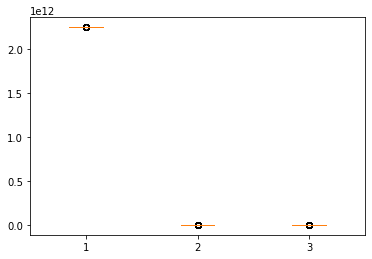

In [49]:
plt.boxplot(df_avril_pandas)


In [67]:
df_final1 = df_final.join(df_avril, ["msisdn", "month"], "left")
df_final1.show(5)

+-------------+-----+--------------+-----------+----------+---------+----------+-----------+---------+------+------------+-------------------+-----------------+----------+------------+-----------------+-------------+-------+------------------+-------------+-----------+----------------+------------+------+-----------------+--------------+-------------------+---------------+---------+--------------------+------+---------------+-------------------+
|       msisdn|month|  distributeur|statut_voix|statut_sms|statut_ff|statut_sva|statut_data|statut_om|valeur|vol_tot_data|vol_tot_voix_offnet|vol_tot_voix_onet|date_appel|nbre_sms_out|nbre_dist_sms_out|nbre_voix_out|dur_out|nbre_dist_voix_out|nbre_cell_out|nbre_sms_in|nbre_dist_sms_in|nbre_voix_in|dur_in|nbre_dist_voix_in|nbre_sms_night|nbre_dist_sms_night|nbre_voix_night|dur_night|nbre_dist_voix_night|statut|nbr_emprunt_sos|mnt_emprunt_tot_sos|
+-------------+-----+--------------+-----------+----------+---------+----------+-----------+--------

##### Mai SOS Crédit 

In [58]:
df_mai = spark.read.option("delimiter", ";").option("header", True).csv("xfraude_sos_credit_mai.csv")

df_mai.show(5)


+-------------+---------------+-------------------+
|       MSISDN|nbr_emprunt_sos|mnt_emprunt_tot_sos|
+-------------+---------------+-------------------+
|2250779512287|              1|               1000|
|2250789285430|              3|                750|
|2250767910529|              2|               1250|
|2250788642011|              3|               1500|
|2250757407261|              1|                500|
+-------------+---------------+-------------------+
only showing top 5 rows



In [59]:
df_mai = df_mai.withColumn("mnt_emprunt_tot_sos", col("mnt_emprunt_tot_sos").cast(DoubleType())) \
                    .withColumn("nbr_emprunt_sos", col("nbr_emprunt_sos").cast(DoubleType()))



In [60]:
cols = [i.lower() for i in df_mai.columns]
df_mai = df_mai.toDF(*(c for c in cols))

In [61]:
df_mai = df_mai.withColumn("month", lit(5))
df_mai.show(5)

+-------------+---------------+-------------------+-----+
|       msisdn|nbr_emprunt_sos|mnt_emprunt_tot_sos|month|
+-------------+---------------+-------------------+-----+
|2250779512287|            1.0|             1000.0|    5|
|2250789285430|            3.0|              750.0|    5|
|2250767910529|            2.0|             1250.0|    5|
|2250788642011|            3.0|             1500.0|    5|
|2250757407261|            1.0|              500.0|    5|
+-------------+---------------+-------------------+-----+
only showing top 5 rows



In [62]:
df_mai.sort(desc("nbr_emprunt_sos")).show()

+-------------+---------------+-------------------+-----+
|       msisdn|nbr_emprunt_sos|mnt_emprunt_tot_sos|month|
+-------------+---------------+-------------------+-----+
|2250779280809|          109.0|            27250.0|    5|
|2250707657515|           75.0|            20500.0|    5|
|2250758175348|           73.0|            18250.0|    5|
|2250758533318|           73.0|            18500.0|    5|
|2250788954782|           72.0|            20000.0|    5|
|2250707209519|           71.0|            18750.0|    5|
|2250779917565|           70.0|            19750.0|    5|
|2250708387395|           70.0|            36000.0|    5|
|2250787278852|           70.0|            18000.0|    5|
|2250769851926|           69.0|            41500.0|    5|
|2250777343717|           69.0|            36000.0|    5|
|2250707737900|           68.0|            19250.0|    5|
|2250769435506|           68.0|            28000.0|    5|
|2250779746338|           67.0|            16750.0|    5|
|2250748598263

In [63]:
df_mai.sort(desc("mnt_emprunt_tot_sos")).show()

+-------------+---------------+-------------------+-----+
|       msisdn|nbr_emprunt_sos|mnt_emprunt_tot_sos|month|
+-------------+---------------+-------------------+-----+
|2250707836950|           43.0|            86000.0|    5|
|2250749907121|           42.0|            84000.0|    5|
|2250707429316|           42.0|            84000.0|    5|
|2250708095563|           44.0|            83000.0|    5|
|2250707901062|           41.0|            82000.0|    5|
|2250708757675|           41.0|            81000.0|    5|
|2250767571586|           40.0|            80000.0|    5|
|2250767732596|           39.0|            78000.0|    5|
|2250769814336|           39.0|            78000.0|    5|
|2250777555037|           38.0|            76000.0|    5|
|2250708958282|           38.0|            76000.0|    5|
|2250759338903|           38.0|            76000.0|    5|
|2250759764143|           37.0|            74000.0|    5|
|2250767737619|           37.0|            74000.0|    5|
|2250749614838

##### Joining

In [71]:
df_final.groupBy("month").count().show()

+-----+-------+
|month|  count|
+-----+-------+
|    7| 411725|
|    8| 164790|
|    5|1654564|
|    6| 487054|
|    9|1247884|
|    4|1351726|
+-----+-------+



In [68]:
df_final1.groupBy("month").count().show()

+-----+-------+
|month|  count|
+-----+-------+
|    7| 411725|
|    8| 164790|
|    5|1654564|
|    6| 487054|
|    9|1247884|
|    4|1351726|
+-----+-------+



In [69]:
df_final.count()

5317743

In [70]:
df_final1.count()

5317743

In [72]:
df_final2 = df_final1.join(df_mai, ["msisdn", "month"], "left")
df_final2.show(5)

+-------------+-----+--------------+-----------+----------+---------+----------+-----------+---------+------+------------+-------------------+-----------------+----------+------------+-----------------+-------------+-------+------------------+-------------+-----------+----------------+------------+------+-----------------+--------------+-------------------+---------------+---------+--------------------+------+---------------+-------------------+---------------+-------------------+
|       msisdn|month|  distributeur|statut_voix|statut_sms|statut_ff|statut_sva|statut_data|statut_om|valeur|vol_tot_data|vol_tot_voix_offnet|vol_tot_voix_onet|date_appel|nbre_sms_out|nbre_dist_sms_out|nbre_voix_out|dur_out|nbre_dist_voix_out|nbre_cell_out|nbre_sms_in|nbre_dist_sms_in|nbre_voix_in|dur_in|nbre_dist_voix_in|nbre_sms_night|nbre_dist_sms_night|nbre_voix_night|dur_night|nbre_dist_voix_night|statut|nbr_emprunt_sos|mnt_emprunt_tot_sos|nbr_emprunt_sos|mnt_emprunt_tot_sos|
+-------------+-----+-------

In [73]:
df_final2.groupBy("month").count().show()

+-----+-------+
|month|  count|
+-----+-------+
|    7| 411725|
|    8| 164790|
|    5|1654564|
|    6| 487054|
|    9|1247884|
|    4|1351726|
+-----+-------+



#### Juin 

In [76]:
df_juin = spark.read.option("delimiter", ";").option("header", True).csv("/Users/youssouf/Downloads/data_for_analyse_fraude/fraude_sos_credit_juin.csv")

df_juin.show(5)


+-------------+---------------+-------------------+
|       MSISDN|nbr_emprunt_sos|mnt_emprunt_tot_sos|
+-------------+---------------+-------------------+
|2250758807127|              5|               1750|
|2250798091953|              2|               1500|
|2250707672450|              1|                500|
|2250708381153|              2|                500|
|2250757407261|              1|                500|
+-------------+---------------+-------------------+
only showing top 5 rows



In [77]:
cols = [i.lower() for i in df_juin.columns]
df_juin = df_juin.toDF(*(c for c in cols))

In [78]:
df_juin = df_juin.withColumn("mnt_emprunt_tot_sos", col("mnt_emprunt_tot_sos").cast(DoubleType())) \
                    .withColumn("nbr_emprunt_sos", col("nbr_emprunt_sos").cast(DoubleType()))



In [79]:
df_juin.sort(desc("mnt_emprunt_tot_sos")).show()

+-------------+---------------+-------------------+
|       msisdn|nbr_emprunt_sos|mnt_emprunt_tot_sos|
+-------------+---------------+-------------------+
|2250758305958|           47.0|            94000.0|
|2250708209881|           46.0|            92000.0|
|2250708757675|           44.0|            88000.0|
|2250769992243|           44.0|            88000.0|
|2250709275656|           41.0|            82000.0|
|2250767737619|           40.0|            80000.0|
|2250707306870|           40.0|            80000.0|
|2250789248914|           40.0|            80000.0|
|2250759526667|           39.0|            78000.0|
|2250747184160|           39.0|            78000.0|
|2250707515658|           39.0|            76250.0|
|2250708095563|           39.0|            74500.0|
|2250707036384|           37.0|            74000.0|
|2250707933920|           36.0|            72000.0|
|2250759764143|           36.0|            72000.0|
|2250767747708|           35.0|            70000.0|
|22507499071

In [80]:
df_juin.sort(desc("mnt_emprunt_tot_sos")).show()

+-------------+---------------+-------------------+
|       msisdn|nbr_emprunt_sos|mnt_emprunt_tot_sos|
+-------------+---------------+-------------------+
|2250758305958|           47.0|            94000.0|
|2250708209881|           46.0|            92000.0|
|2250708757675|           44.0|            88000.0|
|2250769992243|           44.0|            88000.0|
|2250709275656|           41.0|            82000.0|
|2250767737619|           40.0|            80000.0|
|2250707306870|           40.0|            80000.0|
|2250789248914|           40.0|            80000.0|
|2250759526667|           39.0|            78000.0|
|2250747184160|           39.0|            78000.0|
|2250707515658|           39.0|            76250.0|
|2250708095563|           39.0|            74500.0|
|2250707036384|           37.0|            74000.0|
|2250707933920|           36.0|            72000.0|
|2250759764143|           36.0|            72000.0|
|2250767747708|           35.0|            70000.0|
|22507499071

In [82]:
df_juin.describe().show(truncate = False)

+-------+---------------------+------------------+-------------------+
|summary|msisdn               |nbr_emprunt_sos   |mnt_emprunt_tot_sos|
+-------+---------------------+------------------+-------------------+
|count  |3666058              |3666058           |3666058            |
|mean   |2.2507553454063315E12|3.205138871234443 |1559.6669501682734 |
|stddev |2.8674324689006954E7 |3.4867710840797295|2033.3245334113126 |
|min    |2250101020434        |1.0               |250.0              |
|max    |2252734767823        |132.0             |94000.0            |
+-------+---------------------+------------------+-------------------+



In [83]:
df_juin = df_juin.withColumn("month", lit(6))
df_juin.show(5)


+-------------+---------------+-------------------+-----+
|       msisdn|nbr_emprunt_sos|mnt_emprunt_tot_sos|month|
+-------------+---------------+-------------------+-----+
|2250758807127|            5.0|             1750.0|    6|
|2250798091953|            2.0|             1500.0|    6|
|2250707672450|            1.0|              500.0|    6|
|2250708381153|            2.0|              500.0|    6|
|2250757407261|            1.0|              500.0|    6|
+-------------+---------------+-------------------+-----+
only showing top 5 rows



##### Juillet

In [86]:
df_juillet = spark.read.option("delimiter", ";").option("header", True).csv("/Users/youssouf/Downloads/data_for_analyse_fraude/fraude_sos_credit_juillet_.csv")

df_juillet.show(5)


+-------------+---------------+-------------------+
|       MSISDN|nbr_emprunt_sos|mnt_emprunt_tot_sos|
+-------------+---------------+-------------------+
|2250758807127|              2|               1000|
|2250709043414|              1|                250|
|2250707672450|              1|                250|
|2250797344288|              6|               1500|
|2250767368776|              1|               2000|
+-------------+---------------+-------------------+
only showing top 5 rows



In [87]:
cols = [i.lower() for i in df_juillet.columns]
df_juillet = df_juillet.toDF(*(c for c in cols))

In [88]:
df_juillet = df_juillet.withColumn("mnt_emprunt_tot_sos", col("mnt_emprunt_tot_sos").cast(DoubleType())) \
                    .withColumn("nbr_emprunt_sos", col("nbr_emprunt_sos").cast(DoubleType()))



In [89]:
df_juillet.sort(desc("mnt_emprunt_tot_sos")).show()

+-------------+---------------+-------------------+
|       msisdn|nbr_emprunt_sos|mnt_emprunt_tot_sos|
+-------------+---------------+-------------------+
|2250707933920|           54.0|           108000.0|
|2250758305958|           51.0|           102000.0|
|2250709275656|           49.0|            98000.0|
|2250768888897|           45.0|            90000.0|
|2250708595639|           44.0|            86500.0|
|2250788612266|           41.0|            82000.0|
|2250758477383|           39.0|            78000.0|
|2250709717373|           38.0|            76000.0|
|2250707440203|           38.0|            76000.0|
|2250769992243|           38.0|            74500.0|
|2250707897707|           37.0|            74000.0|
|2250777986864|           36.0|            72000.0|
|2250708278808|           36.0|            72000.0|
|2250708087174|           36.0|            72000.0|
|2250748978453|           40.0|            71250.0|
|2250707915500|           35.0|            70000.0|
|22507076131

In [90]:
df_juillet.sort(desc("nbr_emprunt_sos")).show()

+-------------+---------------+-------------------+
|       msisdn|nbr_emprunt_sos|mnt_emprunt_tot_sos|
+-------------+---------------+-------------------+
|2250758573906|           83.0|            20750.0|
|2250758533318|           74.0|            18500.0|
|2250788094200|           72.0|            18500.0|
|2250779351951|           71.0|            17750.0|
|2250758175348|           70.0|            17500.0|
|2250757613747|           70.0|            35500.0|
|2250707746223|           69.0|            17500.0|
|2250748476963|           69.0|            35750.0|
|2250778280718|           68.0|            34500.0|
|2250709437261|           67.0|            16750.0|
|2250778122307|           67.0|            17000.0|
|2250788716943|           67.0|            16750.0|
|2250769720868|           67.0|            16750.0|
|2250709594382|           67.0|            16750.0|
|2250777102666|           66.0|            17250.0|
|2250789110108|           66.0|            16500.0|
|22507887315

In [92]:
df_juillet.describe().show(truncate = False)

+-------+--------------------+-----------------+-------------------+
|summary|msisdn              |nbr_emprunt_sos  |mnt_emprunt_tot_sos|
+-------+--------------------+-----------------+-------------------+
|count  |3619811             |3619811          |3619811            |
|mean   |2.250756351673255E12|3.299167000708048|1601.256805949261  |
|stddev |2.924032394207289E7 |3.590802304656753|2067.434121901588  |
|min    |2250101020434       |1.0              |250.0              |
|max    |2250798799971       |83.0             |108000.0           |
+-------+--------------------+-----------------+-------------------+



In [98]:
df_juillet = df_juillet.withColumn("month", lit(7))
df_juillet.show()



+-------------+---------------+-------------------+-----+
|       msisdn|nbr_emprunt_sos|mnt_emprunt_tot_sos|month|
+-------------+---------------+-------------------+-----+
|2250758807127|            2.0|             1000.0|    7|
|2250709043414|            1.0|              250.0|    7|
|2250707672450|            1.0|              250.0|    7|
|2250797344288|            6.0|             1500.0|    7|
|2250767368776|            1.0|             2000.0|    7|
|2250757554730|            2.0|              500.0|    7|
|2250779624013|            7.0|             2000.0|    7|
|2250787102156|           10.0|             5000.0|    7|
|2250709633550|            1.0|              250.0|    7|
|2250798596685|            2.0|             1500.0|    7|
|2250787382773|            5.0|             1500.0|    7|
|2250707691931|            1.0|              500.0|    7|
|2250708214203|            1.0|             2000.0|    7|
|2250707597745|            2.0|             1000.0|    7|
|2250767665655

#### Aout 

In [99]:
df_aout = spark.read.option("delimiter", ";").option("header", True).csv("/Users/youssouf/Downloads/data_for_analyse_fraude/fraude_sos_credit_aout.csv")

df_aout.show(5)

cols = [i.lower() for i in df_aout.columns]
df_aout = df_aout.toDF(*(c for c in cols))


df_aout = df_aout.withColumn("mnt_emprunt_tot_sos", col("mnt_emprunt_tot_sos").cast(DoubleType())) \
                    .withColumn("nbr_emprunt_sos", col("nbr_emprunt_sos").cast(DoubleType()))


df_aout = df_aout.withColumn("month", lit(8))

df_aout.sort(desc("mnt_emprunt_tot_sos")).show()


df_aout.sort(desc("nbr_emprunt_sos")).show()


df_aout.describe().show(truncate = False)



+-------------+---------------+-------------------+
|       MSISDN|nbr_emprunt_sos|mnt_emprunt_tot_sos|
+-------------+---------------+-------------------+
|2250747335298|              3|               3000|
|2250709043414|              2|                500|
|2250749534834|              7|               1750|
|2250747237893|              1|                250|
|2250788130438|              2|               1000|
+-------------+---------------+-------------------+
only showing top 5 rows

+-------------+---------------+-------------------+-----+
|       msisdn|nbr_emprunt_sos|mnt_emprunt_tot_sos|month|
+-------------+---------------+-------------------+-----+
|2250708942008|           58.0|           116000.0|    8|
|2250707361334|           53.0|           106000.0|    8|
|2250757810611|           45.0|            88500.0|    8|
|2250757298539|           42.0|            84000.0|    8|
|2250747181918|           41.0|            82000.0|    8|
|2250707897707|           41.0|            

#### Septembre

In [100]:
df_sept = spark.read.option("delimiter", ";").option("header", True).csv("/Users/youssouf/Downloads/data_for_analyse_fraude/fraude_sos_credit_sep.csv")

df_sept.show(5)

cols = [i.lower() for i in df_sept.columns]
df_sept = df_sept.toDF(*(c for c in cols))


df_sept = df_sept.withColumn("mnt_emprunt_tot_sos", col("mnt_emprunt_tot_sos").cast(DoubleType())) \
                    .withColumn("nbr_emprunt_sos", col("nbr_emprunt_sos").cast(DoubleType()))

df_sept = df_sept.withColumn("month", lit(9))

df_sept.sort(desc("mnt_emprunt_tot_sos")).show()


df_sept.sort(desc("nbr_emprunt_sos")).show()


df_sept.describe().show(truncate = False)


+-------------+---------------+-------------------+
|       MSISDN|nbr_emprunt_sos|mnt_emprunt_tot_sos|
+-------------+---------------+-------------------+
|2250758807127|              7|               1750|
|2250757136704|             12|               5250|
|2250767910529|              1|                250|
|2250747237893|              6|               1500|
|2250788130438|              1|                500|
+-------------+---------------+-------------------+
only showing top 5 rows

+-------------+---------------+-------------------+-----+
|       msisdn|nbr_emprunt_sos|mnt_emprunt_tot_sos|month|
+-------------+---------------+-------------------+-----+
|2250787323211|           50.0|           100000.0|    9|
|2250708003063|           51.0|            98500.0|    9|
|2250708595639|           45.0|            90000.0|    9|
|2250757810611|           44.0|            88000.0|    9|
|2250709275656|           39.0|            78000.0|    9|
|2250749528404|           38.0|            

#### Union df

In [101]:
df_month = df_avril.union(df_mai).union(df_juin).union(df_juillet).union(df_aout).union(df_sept)
df_month.show(5)

df_month.groupBy("month").count().show()

+-------------+---------------+-------------------+-----+
|       msisdn|nbr_emprunt_sos|mnt_emprunt_tot_sos|month|
+-------------+---------------+-------------------+-----+
|2250758807127|            1.0|              500.0|    4|
|2250789285430|            1.0|              250.0|    4|
|2250749534834|            1.0|              500.0|    4|
|2250788064515|            2.0|              500.0|    4|
|2250788130438|            3.0|             1000.0|    4|
+-------------+---------------+-------------------+-----+
only showing top 5 rows

+-----+-------+
|month|  count|
+-----+-------+
|    6|3666058|
|    5|3734047|
|    9|3639982|
|    4|3697199|
|    8|3721097|
|    7|3619811|
+-----+-------+



In [ ]:
#### Last join

In [102]:
df_finall = df_final.join(df_month, ["msisdn", "month"], "left")
df_finall.show(5)

df_finall.groupBy("month").count().show()

+-------------+-----+--------------+-----------+----------+---------+----------+-----------+---------+------+------------+-------------------+-----------------+----------+------------+-----------------+-------------+-------+------------------+-------------+-----------+----------------+------------+------+-----------------+--------------+-------------------+---------------+---------+--------------------+------+---------------+-------------------+
|       msisdn|month|  distributeur|statut_voix|statut_sms|statut_ff|statut_sva|statut_data|statut_om|valeur|vol_tot_data|vol_tot_voix_offnet|vol_tot_voix_onet|date_appel|nbre_sms_out|nbre_dist_sms_out|nbre_voix_out|dur_out|nbre_dist_voix_out|nbre_cell_out|nbre_sms_in|nbre_dist_sms_in|nbre_voix_in|dur_in|nbre_dist_voix_in|nbre_sms_night|nbre_dist_sms_night|nbre_voix_night|dur_night|nbre_dist_voix_night|statut|nbr_emprunt_sos|mnt_emprunt_tot_sos|
+-------------+-----+--------------+-----------+----------+---------+----------+-----------+--------

In [103]:
df_finall.write.mode("overwrite").format("parquet").save("/Users/youssouf/Documents/simboxv2/df_final_simbox_v4.parquet")



In [104]:
df_finall.groupBy(["month", "statut", "mnt_emprunt_tot_sos", "nbr_emprunt_sos"]).count().show()

+-----+------+-------------------+---------------+-----+
|month|statut|mnt_emprunt_tot_sos|nbr_emprunt_sos|count|
+-----+------+-------------------+---------------+-----+
|    9|     0|             1750.0|            6.0| 3036|
|    8|     0|             2500.0|            5.0|  678|
|    4|     0|             3250.0|            8.0|  513|
|    5|     1|             8000.0|            7.0|    3|
|    6|     0|             5750.0|           23.0|   86|
|    6|     0|            17000.0|            9.0|   34|
|    6|     0|            13000.0|           25.0|   20|
|    9|     0|             8000.0|           14.0|    4|
|    6|     0|             5250.0|           20.0|  106|
|    8|     0|             8500.0|            8.0|    5|
|    6|     0|            10000.0|           16.0|    7|
|    8|     0|            10250.0|           14.0|    2|
|    4|     1|             3500.0|           13.0|    5|
|    9|     1|             3500.0|           14.0|    3|
|    7|     1|             8500

In [114]:
#df_finall.filter((col("statut") == 1) & (col("mnt_emprunt_tot_sos").isNotNull))

In [117]:
df_finall.filter((col("mnt_emprunt_tot_sos") >= 11250.0) & (col("statut") == 1)).select("msisdn", "statut").show()

+-------------+------+
|       msisdn|statut|
+-------------+------+
|2250707675223|     1|
|2250707675223|     1|
|2250778970966|     1|
|2250798315405|     1|
|2250708460113|     1|
|2250778052096|     1|
|2250779231386|     1|
|2250777430281|     1|
|2250778742661|     1|
|2250767960919|     1|
|2250777430626|     1|
|2250707383354|     1|
|2250707880243|     1|
|2250777955311|     1|
|2250748679062|     1|
|2250788172830|     1|
|2250788172830|     1|
|2250769419481|     1|
|2250777430281|     1|
|2250768258783|     1|
+-------------+------+
only showing top 20 rows



##### sos crédit final data

In [4]:
df_final_sos = spark.read.parquet("/Users/youssouf/Documents/simboxv2/df_final_simbox_v4.parquet")
df_final_sos.show(5)


+-------------+-----+--------------+-----------+----------+---------+----------+-----------+---------+------+------------+-------------------+-----------------+----------+------------+-----------------+-------------+-------+------------------+-------------+-----------+----------------+------------+------+-----------------+--------------+-------------------+---------------+---------+--------------------+------+---------------+-------------------+
|       msisdn|month|  distributeur|statut_voix|statut_sms|statut_ff|statut_sva|statut_data|statut_om|valeur|vol_tot_data|vol_tot_voix_offnet|vol_tot_voix_onet|date_appel|nbre_sms_out|nbre_dist_sms_out|nbre_voix_out|dur_out|nbre_dist_voix_out|nbre_cell_out|nbre_sms_in|nbre_dist_sms_in|nbre_voix_in|dur_in|nbre_dist_voix_in|nbre_sms_night|nbre_dist_sms_night|nbre_voix_night|dur_night|nbre_dist_voix_night|statut|nbr_emprunt_sos|mnt_emprunt_tot_sos|
+-------------+-----+--------------+-----------+----------+---------+----------+-----------+--------

In [6]:
df_final_sos.filter(col("statut") == 1).select("msisdn").distinct().count()

28618

In [23]:
df_final_sos.filter( (col("statut") == 1) & (col("nbr_emprunt_sos").isNotNull()) ).select("msisdn", "statut").show()

+-------------+------+
|       msisdn|statut|
+-------------+------+
|2250707094964|     1|
|2250707133841|     1|
|2250707148230|     1|
|2250707382875|     1|
|2250707382875|     1|
|2250707719102|     1|
|2250707947223|     1|
|2250708028456|     1|
|2250708090337|     1|
|2250708163531|     1|
|2250708180389|     1|
|2250708180389|     1|
|2250708276636|     1|
|2250708276636|     1|
|2250708396150|     1|
|2250708420383|     1|
|2250708504089|     1|
|2250708541762|     1|
|2250708558005|     1|
|2250708589180|     1|
+-------------+------+
only showing top 20 rows



In [24]:
df_final_sos.filter( (col("statut") == 1) & (col("nbr_emprunt_sos").isNotNull()) ).select("msisdn", "statut").count()


19750

In [40]:
df_final_sos.filter( (col("statut") == 1) & (col("nbr_emprunt_sos").isNotNull()) ).select(countDistinct("msisdn")).show()



+----------------------+
|count(DISTINCT msisdn)|
+----------------------+
|                 14545|
+----------------------+



In [22]:
df_final_sos.filter( (col("statut") == 1) ).select(countDistinct("msisdn")).show()


+----------------------+
|count(DISTINCT msisdn)|
+----------------------+
|                 28618|
+----------------------+



In [37]:
df_final_sos.filter( (col("statut") == 1) ).select(count("msisdn")).show()


+-------------+
|count(msisdn)|
+-------------+
|        39238|
+-------------+



In [36]:
df_final_sos.filter( (col("statut") == 1) & (col("nbr_emprunt_sos").isNull()) ).select("msisdn", "statut").count()


19488

In [39]:
df_final_sos.filter( (col("statut") == 1) & (col("nbr_emprunt_sos").isNull()) ).select(countDistinct("msisdn")).show()


+----------------------+
|count(DISTINCT msisdn)|
+----------------------+
|                 15956|
+----------------------+



In [42]:
df_final_sos.filter( (col("statut") == 0) & (col("nbr_emprunt_sos").isNull()) ).select(countDistinct("msisdn")).show()




+----------------------+
|count(DISTINCT msisdn)|
+----------------------+
|                166941|
+----------------------+



In [43]:
df_final_sos_0 = df_final_sos.filter( (col("statut") == 0) )
df_final_sos_1_nbr_empr = df_final_sos.filter( (col("statut") == 1) & (col("nbr_emprunt_sos").isNull()) )

df_final_sos_true = df_final_sos_0.union(df_final_sos_1_nbr_empr)

In [44]:
df_final_sos_true.groupBy("statut").count().show()

+------+-------+
|statut|  count|
+------+-------+
|     0|5278505|
|     1|  19488|
+------+-------+



In [45]:
df_final_sos.groupBy("statut").count().show()

+------+-------+
|statut|  count|
+------+-------+
|     0|5278505|
|     1|  39238|
+------+-------+



In [46]:

df_final_sos_true.write.mode("overwrite").format("parquet").save("/Users/youssouf/Documents/simboxv2/df_final_sos_true.parquet")




In [47]:
df_final_sos_true.columns

['msisdn',
 'month',
 'distributeur',
 'statut_voix',
 'statut_sms',
 'statut_ff',
 'statut_sva',
 'statut_data',
 'statut_om',
 'valeur',
 'vol_tot_data',
 'vol_tot_voix_offnet',
 'vol_tot_voix_onet',
 'date_appel',
 'nbre_sms_out',
 'nbre_dist_sms_out',
 'nbre_voix_out',
 'dur_out',
 'nbre_dist_voix_out',
 'nbre_cell_out',
 'nbre_sms_in',
 'nbre_dist_sms_in',
 'nbre_voix_in',
 'dur_in',
 'nbre_dist_voix_in',
 'nbre_sms_night',
 'nbre_dist_sms_night',
 'nbre_voix_night',
 'dur_night',
 'nbre_dist_voix_night',
 'statut',
 'nbr_emprunt_sos',
 'mnt_emprunt_tot_sos']

In [48]:
from pyspark.sql import Row
from pyspark.ml.linalg import Vectors

In [ ]:
nb = NaiveBayes(smoothing=1.0, modelType="multinomial", weightCol="weight")

In [52]:
liste_columns = ['msisdn', 'month', 'distributeur', 'statut_voix', 'statut_sms', 'statut_ff', 'statut_sva', 'statut_data',
 'statut_om', 'valeur', 'vol_tot_data', 'vol_tot_voix_offnet', 'vol_tot_voix_onet', 'date_appel', 'nbre_sms_out',
 'nbre_dist_sms_out', 'nbre_voix_out', 'dur_out', 'nbre_dist_voix_out', 'nbre_cell_out', 'nbre_sms_in', 'nbre_dist_sms_in',
 'nbre_voix_in', 'dur_in', 'nbre_dist_voix_in', 'nbre_sms_night', 'nbre_dist_sms_night', 'nbre_voix_night', 'dur_night',
 'nbre_dist_voix_night','statut', 'nbr_emprunt_sos', 'mnt_emprunt_tot_sos']

columns_to_non_cast = ['date_appel', 'msisdn', 'distributeur', 'month']
columns_to_cast = list(set(liste_columns) - set(columns_to_non_cast))


In [55]:
v = columns_to_cast.remove("statut")unwanted = {'statut'}
inputcol = [e for e in columns_to_cast if e not in unwanted]

SyntaxError: invalid syntax (<ipython-input-55-a0d45d54117b>, line 1)

In [54]:
v

In [56]:
unwanted = {'statut'}
inputcol = [e for e in columns_to_cast if e not in unwanted]

In [57]:
inputcol

['vol_tot_voix_offnet',
 'nbre_dist_sms_night',
 'statut_sms',
 'nbre_voix_out',
 'nbre_voix_in',
 'nbre_sms_night',
 'nbre_cell_out',
 'nbre_sms_in',
 'nbre_dist_voix_night',
 'statut_voix',
 'mnt_emprunt_tot_sos',
 'dur_out',
 'vol_tot_voix_onet',
 'dur_in',
 'dur_night',
 'nbre_sms_out',
 'nbre_dist_sms_in',
 'nbre_dist_voix_in',
 'statut_om',
 'statut_sva',
 'nbre_dist_voix_out',
 'statut_ff',
 'statut_data',
 'vol_tot_data',
 'nbr_emprunt_sos',
 'valeur',
 'nbre_dist_sms_out',
 'nbre_voix_night']

In [58]:
import argparse


#### Check_Fraudeur_Date

In [60]:
def check_fraudeur_date(path_df, date) :
    from datetime import datetime

    #path_df = "/Users/youssouf/Downloads/simbox_v4_prediction_" + model + "_" + date + ".parquet"
    #"/Users/youssouf/Documents/simboxv2/prediction_gbt_vbm_30_v4_dist.parquet"
    df = spark.read.parquet(path_df)
    df1 = df.filter(col("prediction") == 1)
      
    df_fraudeur_FRA = spark.read.option("header", True) \
                        .option("delimiter", ";") \
                        .csv("/Users/youssouf/Downloads/simbox_fra_2809_0610.csv")
    df_fraudeur_FRA = df_fraudeur_FRA.withColumn("msisdn", concat(lit("22507") , col("MSISDN")))

    d = datetime.strptime(date , '%Y%m%d')
    d = datetime.strftime(d, "%d/%m/%Y")
    
    df_fraudeur = df_fraudeur_FRA.filter(col("Date_DETECTION") == d)
    
    res = {"NOMBRE DE DETECTION" : df.filter(col("prediction") == 1).count() , 
           "NOMBRE DE FRA" : df_fraudeur.count() ,
           "NOMBRE COMMUN" : df1.join(df_fraudeur, ["msisdn"], "inner").count(), 
           "NOMBRE FRAU/NON-FRAU": df.groupBy("prediction").count().show() }

    return res

In [69]:
check_fraudeur_date("/Users/youssouf/Documents/simboxv2/prediction_dtunder_20211006.parquet", "20211006")

+----------+-----+
|prediction|count|
+----------+-----+
|       0.0|19654|
|       1.0| 9530|
+----------+-----+



{'NOMBRE DE DETECTION': 9530,
 'NOMBRE DE FRA': 405,
 'NOMBRE COMMUN': 2,
 'NOMBRE FRAU/NON-FRAU': None}

In [76]:
check_fraudeur_date("/Users/youssouf/Documents/simboxv2/prediction_gbtunder_20210930.parquet", "20210930") 


+----------+-------+
|prediction|  count|
+----------+-------+
|       0.0|1357304|
|       1.0|6184286|
+----------+-------+



{'NOMBRE DE DETECTION': 6184286,
 'NOMBRE DE FRA': 334,
 'NOMBRE COMMUN': 261,
 'NOMBRE FRAU/NON-FRAU': None}

In [75]:

check_fraudeur_date("/Users/youssouf/Documents/simboxv2/prediction_rfunder_20210930.parquet", "20210930") 


+----------+-------+
|prediction|  count|
+----------+-------+
|       0.0| 512561|
|       1.0|7029029|
+----------+-------+



{'NOMBRE DE DETECTION': 7029029,
 'NOMBRE DE FRA': 334,
 'NOMBRE COMMUN': 218,
 'NOMBRE FRAU/NON-FRAU': None}

In [63]:
df_final = spark.read.\
       option("header", "true").\
       option("delimiter", ";").\
       csv("/Users/youssouf/Downloads/trafic_global_20211006.csv")

df_final.show()

+----------+-------------+------------+-----------------+-------------+-------+------------------+-------------+-----------+----------------+------------+------+-----------------+--------------+-------------------+---------------+---------+--------------------+
|date_appel|       msisdn|nbre_sms_out|nbre_dist_sms_out|nbre_voix_out|dur_out|nbre_dist_voix_out|nbre_cell_out|nbre_sms_in|nbre_dist_sms_in|nbre_voix_in|dur_in|nbre_dist_voix_in|nbre_sms_night|nbre_dist_sms_night|nbre_voix_night|dur_night|nbre_dist_voix_night|
+----------+-------------+------------+-----------------+-------------+-------+------------------+-------------+-----------+----------------+------------+------+-----------------+--------------+-------------------+---------------+---------+--------------------+
|  20211006|2250700429930|         1.0|              1.0|          0.0|    0.0|               0.0|          0.0|        5.0|             2.0|         0.0|   0.0|              0.0|             0|                  0|